# Coursework 1


Author: Javier Ramirez

Date: 11/11/2019

## Introduction

In this coursework, we will be creating and training an Artificial Neural Network in order to perform multi-class classification, and we will try to achieve the most accurate training possible. For this purpose, we will be using the TensorFlow and Keras Python libraries.

### Dataset

We will use the Keras Fashion-MNIST database. This is a dataset that includes a total of 70,000 28x28 grayscale images classified within 10 fashion categories. We will use 60,000 of these images for training our network, and 10,000 for testing the already trained model. Each of these images has a label (0-9) that indicates what fashion category it has been classified within. The labels correspond to the following:
    
    Label   Description    

       0	T-shirt/top
       1	Trouser
       2	Pullover
       3	Dress
       4	Coat
       5	Sandal
       6	Shirt
       7	Sneaker
       8	Bag
       9	Ankle boot

### Goal

Our goal with this experiment is to create and train an ANN using the Fashion-MNIST database. Once this ANN has been created and trained, we will play with the different hyper-parameters that affect the training process in order to find which combination of parameters gives us the best results, achieving the most accurate training possible.

The parameters we will change within our network are: learning rate, number of hidden layers, number of units in each layer, number of epochs, dropout value, and weight regularization. We will modify these parameters, then train our network, and lastly, test the network and record the results.

## Methods

In this section, we will write and explain the code for creating and training our ANN.

### Dependencies

First, we need to import all the necessary depenencies in order to create and train our network.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import regularizers

Using TensorFlow backend.


### Data Loading

After importing the fashion_mnist dataset to our sketch, along with other dependencies, we can load the dataset onto our machine.

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Data Reshaping & Value Normalization

The original training data is an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255], which indicates the greyscale value of each pixel in each of the 60,000 training images. The same applies for the test data.

In order to feed in the data in a shape that our networks expects, we will have to reshape it. With the code below, we will transform the training data into a float32 array of shape (60000, 28 * 28) with values between 0 and 1, and the test data into a float32 array of shape (10000, 28 * 28) with values between 0 and 1.

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Categorical Encoding

Next, we categorically encode the labels. This means that instead of having a 1 dimensional array for each set (training and testing) that contains all the labels of that set, i.e. [4, 6, 1, 6, 3 ... 4, 8, 7, 1], we will have an array of shape (60000, 10) for the training set and another one of shape (10000, 10) for the test set. These arrays are vectors of 0s and 1s that indicate which label each image has, i.e. [0, 0, 0 ... 1, 0] for label 8.

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Validation Data

We create a validation set in order to monitor the accuracy of the model during training. We will use one third of the images on the training set as the validation set.

In [5]:
val_images = train_images[:20000]
partial_images = train_images[20000:]

val_labels = train_labels[:20000]
partial_labels = train_labels[20000:]

All the code written up to this point will remain unchanged throughout all our experimentation. This is because so far, we have only loaded our input and changed its shape, which is an important and necessary part of creating our network, but does not include any hyper-parameters that can change the training results.

From now on, the code written will be responsible for building and training our network, and the hyper-parameters within it will be changed in order to evaluate their effect on the training process. The exact code found below is the version of the code that includes the values of the hyper-parameters that yield the best results after experimentation.

### Build Network

With the input data sorted out correctly, our first step now is to build our network. We will build a model that is sequential, which will not change through our experimentation. Our model will be made up of dense layers, which will also not change. On the other hand, we will experiment with the number of hidden layers, the number of nodes within each of these layers, the batch size, the dropout value, and the weight regularisation.

In [6]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu'))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

### Compile Network

In this step, we will compile our network. The only hyper-parameter in this piece of code is the Learning Rate, which we will change in order to find the most appropiate one for this specific scenario.

In [7]:
network.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Training

With our network already built, we are ready to start training it using the fit() function. Here we find two hyper-parameters, the epoch number and the batch size, two variables that are very important in the training process, and which we will also play with.

In [8]:
history = network.fit(partial_images,
                    partial_labels,
                    epochs=30,
                    batch_size=256,
                    validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/30
40000/40000 [==============================] - 5s 134us/sample - loss: 0.6767 - accuracy: 0.7545 - val_loss: 0.4784 - val_accuracy: 0.8242
Epoch 2/30
40000/40000 [==============================] - 5s 117us/sample - loss: 0.4394 - accuracy: 0.8373 - val_loss: 0.5421 - val_accuracy: 0.7973
Epoch 3/30
40000/40000 [==============================] - 4s 109us/sample - loss: 0.3778 - accuracy: 0.8596 - val_loss: 0.6712 - val_accuracy: 0.7495
Epoch 4/30
40000/40000 [==============================] - 4s 107us/sample - loss: 0.3442 - accuracy: 0.8730 - val_loss: 0.4199 - val_accuracy: 0.8515
Epoch 5/30
40000/40000 [==============================] - 5s 130us/sample - loss: 0.3194 - accuracy: 0.8798 - val_loss: 0.3880 - val_accuracy: 0.8600
Epoch 6/30
40000/40000 [==============================] - 5s 121us/sample - loss: 0.2947 - accuracy: 0.8898 - val_loss: 0.3671 - val_accuracy: 0.8690
Epoch 7/30
40000/40000 [==========================

### Testing

Now that the network has already been trained, we can test it against our test data, which is a part of the original data that the network has not been exposed to yet. This will help us to measure how well we've trained our network.

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.8834


## Results

As mentioned above, the hyper-parameters that we have played with are: learning rate, number of hidden layers, number of units in each layer, number of epochs, dropout value, and weight regularization. Because there are so many different combinations of the values of these parameters that we could have tested, we have focused on one paramater at a time. This way, we have tried different values of the same parameter in different runs, and have chosen the one that yields the best result, moving forward to testing other parameters with that new value.

We ran a total of 23 training sessions, tring to achieve the highest test accuracy possible. The results of these runs has been recorded in the table below.

|Run | Learning Rate | Hidden Layers | Units in Layers | Batch Size | Epochs | Dropout | Weight Regularization | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy | Test Accuracy 
|:--:|:-----:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| 1 | 0.01 | 1 | 512 | 512 | 20 | No | No | 0.2841 | 0.8987 | 0.8324 | 0.8110 | 0.799
| 2 | 0.01 | 2 | 512 | 512 | 20 | No | No | 0.3350 | 0.8810 | 0.6233 | 0.8372 | 0.829
| 3 | 0.01 | 3 | 512 | 512 | 20 | No | No | 0.3485 | 0.8746 | 0.6889 | 0.8418 | 0.838
| 4 | 0.01 | 1 | 1024 | 512 | 20 | No | No | 0.2817 | 0.8968 | 0.5081 | 0.8539 | 0.8447
| 5 | 0.01 | 2 | 1024 | 512 | 20 | No | No | 0.3438 | 0.8766 | 0.5364 | 0.8562 | 0.8507
| 6 | 0.01 | 3 | 1024 | 512 | 20 | No | No | 0.3731 | 0.8647 | 0.7014 | 0.7932 | 0.7897
| 7 | 0.01 | 1 | 256 | 512 | 20 | No | No | 0.2426 | 0.9157 | 0.9899 | 0.7872 | 0.7855
| 8 | 0.01 | 2 | 256 | 512 | 20 | No | No | 0.3349 | 0.8776 | 0.6486 | 0.8330 | 0.8253
| 9 | 0.01 | 3 | 256 | 512 | 20 | No | No | 0.3466 | 0.8737 | 0.5323 | 0.8387 | 0.8303
| 10 | 0.01 | 2 | 512 | 512 | 10 | No | No | 0.3908 | 0.8585 | 0.7264 | 0.7771 | 0.7691
| 11 | 0.01 | 2 | 512 | 512 | 30 | No | No | 0.3134 | 0.8946 | 0.6825 | 0.7771 | 0.8594
| 12 | 0.001 | 2 | 512 | 512 | 30 | No | No | 0.1299 | 0.9498 | 0.4550 | 0.8763 | 0.8755
| 13 | 0.1 | 2 | 512 | 512 | 30 | No | No | 1.5681 | 0.3484 | 1.5987 | 0.3436 | 0.3489
| 14 | 0.001 | 2 | 512 | 256 | 30 | No | No | 0.1309 | 0.9509 | 0.6034 | 0.8886 | 0.8871
| 15 | 0.001 | 2 | 512 | 128 | 30 | No | No | 0.1645 | 0.9426 | 0.6566 | 0.8801 | 0.8801
| 16 | 0.001 | 2 | 512 | 256 | 10 | No | No | 0.0921 | 0.9664 | 1.3838 | 0.8716 | 0.8658
| 17 | 0.001 | 2 | 512 | 256 | 10 | 0.5 | No | 0.3549 | 0.8727 | 0.3598 | 0.8697 | 0.8615
| 18 | 0.001 | 2 | 512 | 256 | 30 | 0.5 | No | 0.2726 | 0.9017 | 0.3834 | 0.8893 | 0.8851
| 19 | 0.001 | 2 | 512 | 256 | 30 | 0.2 | No | 0.1858 | 0.9299 | 0.5133 | 0.8848 | 0.8782
| 20 | 0.001 | 2 | 512 | 256 | 30 | 0.5 | L1 0.001 | 1.2634 | 0.7706 | 1.1609 | 0.7991 | 0.7865
| 21 | 0.001 | 2 | 512 | 256 | 30 | 0.5 | L2 0.001 | 0.5109| 0.8512 | 0.5084 | 0.8528 | 0.8465
| 22 | 0.001 | 2 | 512 | 256 | 10 | No | No | 0.2700 | 0.9015 | 0.3748 | 0.8907 | 0.8829
| 23 | 0.001 | 2 | 512 | 256 | 2 | No | No | 0.2706 | 0.9050 | 0.3804 | 0.8929 | 0.8839

As we can observe, we obtained the highest result on run 14 with an accuracy of 89%. In this run, we used 2 hidden layers with 512 nodes each, a 256 batch size, a learning rate of 0.001, 30 epochs, no dropout, and no weight regularization.

Below, is a graph showing the training and validation loss through the total 30 epochs. 

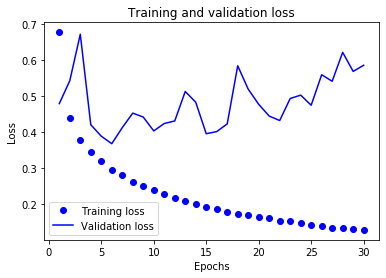

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can observe that the model starts overfitting somewhere around 5 and 10 epochs, so we shouldn't need a 30 epoch run to achieve high accuracy. That's why we ran two extra tests at the end, changing only the epochs and no other hyper-parameter. In these test, with 10 and 2 epochs, we obtained almost the same accuracy as in the 30 epoch run.

## Evaluation

We have observed that, in this scenario, the architecture of our network, i.e. the number of layers and nodes per layer, has been the most decisive variable in the training process, affecting the accuracy of the training greatly. Making the Learning Rate smaller was also succesful at improving the accuracy, while making it bigger had a debastating effect (accuracy went down to 35% with a LR of 0.1). Other hyper-parameters on the other hand did not have such a drastic effect on the training, but rather a small one. Even though we achieved our highest accuracy at 30 epochs, we demonstrated that overfitting happened before the 10 first epochs, and therefore such a high number of epochs is not necessary to achieve high accuracy. In fact, overfitting is an issue we must be aware of when working with ANNs, and must try to avoid it.

We have made good improvement on the accuracy of our network by tweaking the different hyper-parameters that condition its training, however, it is clear that the model used in this network is not ideal for this dataset, as a 89% percent accuracy is not high enough to be applied to a real life scenario. A convolutional network would probably be a better choice of architechture for this task.